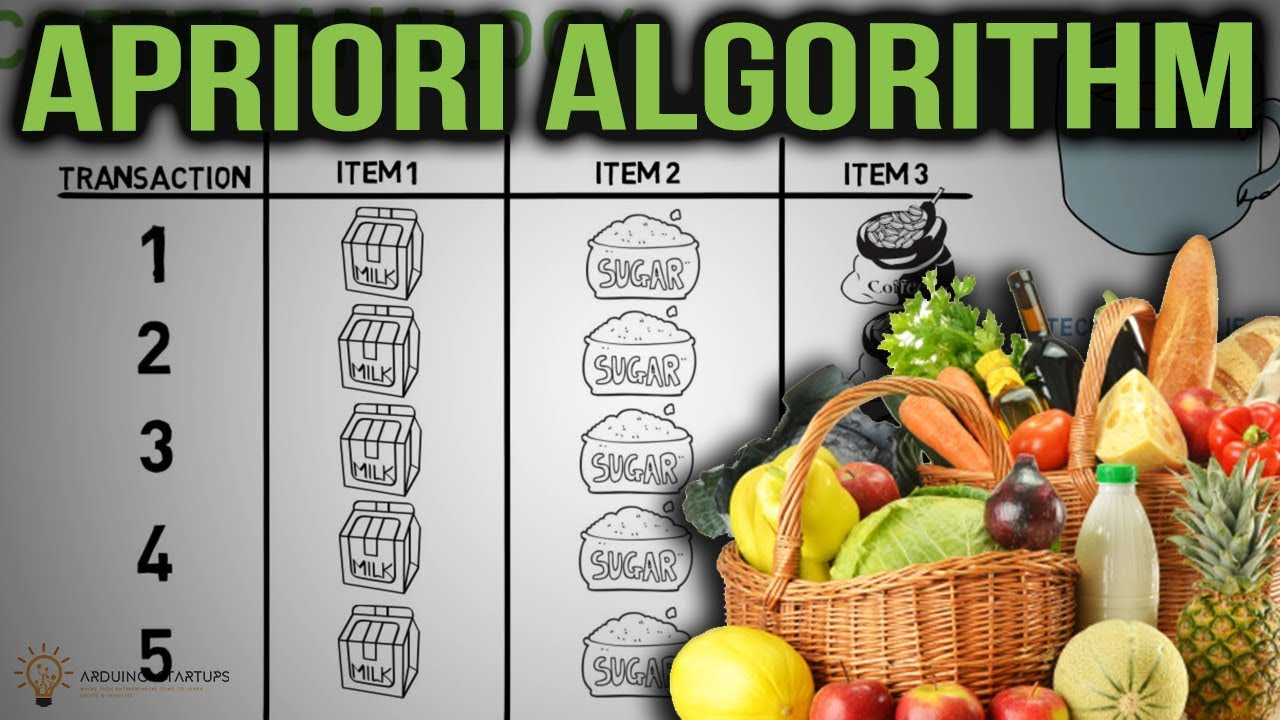

In [1]:
from IPython.display import Image
Image('/home/adish/Desktop/apriori.jpg')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/home/adish/Desktop/Market_Basket_Optimisation.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.values[0,1]  # accessing element at position[0,1] in a dataframe

'almonds'

In [5]:
df.shape

(7501, 20)

### LIST COMPREHENSION

In [6]:
# r=[x**2 for x in range(10)]
# r
r=[]
for x in range(10):
    r.append(x**2)
    
r

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [7]:
#apriori function in apyori module will not take panda's dataframe as input, instead it takes input as
# a list of transactions.

transactions=[] 
for i in range(0,7501):
    transactions.append([str(df.values[i,j]) for j in  range(0,20)])
transactions    


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

### Training 

In [8]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.003,min_confidence=0.2,min_left=3,min_length=2,max_length=2)#transactions represent the data on which the algo is to be applied
#we want to consider products that appeared atleast 4 times a day
#therefore this product might have appeared for (7*4=28 times in a week)
#support=number of times product appeared in the transaction / total number of transactions
# min_support=(28/7501)


#min_length->min.number of elements you want in your rule (left/right)  and max_length->max.number of elements you want inyour rule(left/right)


In [9]:
28/7501

0.0037328356219170776

In [10]:
association_rules=list(rules)
association_rules

#item_base->indicates LHS of rule
#item_add->indicates RHS of rule
#items_base=frozenset({'almonds'}), items_add=frozenset({'chocolates'}), confidence=0.25490196078431376(chance to buy chocolates if someone buys almonds), lift=2.923577382023146

[RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]),
 RelationRecord(items=frozenset({'nan'}), support=0.9998666844420744, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.9998666844420744, lift=1.0)]),
 RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'almonds', 'chocolate'}), support=0.005999200106652446, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'chocolate'}), confidence=0.29411764705882354, lift=1.7950988369310295)]),
 RelationRecord(items=frozenset({'eggs', 'almonds'}), suppo

## tuples: immutable lists

## frozensets are immutable sets and do not support indexing

In [71]:
for i in association_rules:
    lhs=tuple(association_rules[1][2])[0]
lhs

OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.9998666844420744, lift=1.0)

[RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]),

In [73]:
def inspect(association_rules):
    lhs         = [tuple(result[2][0])[0] for result in association_rules]
    rhs         = [tuple(result[2][0])[1] for result in association_rules]
    supports    = [result[1] for result in association_rules]
    confidences = [result[2][0][2] for result in association_rules]
    lifts       = [result[2][0][3] for result in association_rules]
    return list(zip(lhs, rhs, supports, confidences, lifts))
df1 = pd.DataFrame(inspect(association_rules), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [74]:
df1

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,(),(mineral water),0.238368,0.238368,1.000000
1,(),(nan),0.999867,0.999867,1.000000
2,(almonds),(burgers),0.005199,0.254902,2.923577
3,(almonds),(chocolate),0.005999,0.294118,1.795099
4,(almonds),(eggs),0.006532,0.320261,1.782108
...,...,...,...,...,...
390,(vegetables mix),(spaghetti),0.005599,0.217617,1.249879
391,(white wine),(spaghetti),0.004533,0.274194,1.574828
392,(whole wheat pasta),(spaghetti),0.008799,0.298643,1.715251
393,(whole wheat rice),(spaghetti),0.014131,0.241458,1.386811


In [75]:
df1.nlargest(n=15,columns='Lift')#n-number of columsn to return#column-based on which column you want to sort

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
206,(fromage blanc),(honey),0.003333,0.245098,5.164271
81,(light cream),(chicken),0.004533,0.290598,4.843951
173,(pasta),(escalope),0.005866,0.372881,4.700812
377,(pasta),(shrimp),0.005066,0.322034,4.506672
374,(whole wheat pasta),(olive oil),0.007999,0.271493,4.122410
246,(tomato sauce),(ground beef),0.005333,0.377358,3.840659
171,(mushroom cream sauce),(escalope),0.005733,0.300699,3.790833
236,(herb & pepper),(ground beef),0.015998,0.323450,3.291994
267,(light cream),(olive oil),0.003200,0.205128,3.114710
2,(almonds),(burgers),0.005199,0.254902,2.923577
